In [ ]:
pip install face-recognition

     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=81d34f79a952c2be7f43195fd6abf96039973780e4ad73b613b03545412a2098
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models


In [ ]:
pip install Dlib

In [ ]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.6 MB/s 


In [ ]:
import face_recognition
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/My Drive/Face_to_BMI.zip'

Archive:  /content/drive/My Drive/Face_to_BMI.zip
   creating: Face_to_BMI/Data/
  inflating: Face_to_BMI/Data/annotation.csv  
   creating: Face_to_BMI/Data/Images_vip/
  inflating: Face_to_BMI/Data/Images_vip/f_001.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_002.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_003.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_004.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_005.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_006.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_007.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_008.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_009.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_010.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_011.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_012.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_013.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_014.jpg  
  inflating: Face_to_BMI/Data/Images_vip/f_015.jpg  
  inflating: Face_to_BMI/Data/Image

In [ ]:
df = pd.read_csv('/content/Face_to_BMI/Data/annotation.csv')

In [ ]:
df

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851
...,...,...,...,...
1021,m_509,1.91,116.0,31.797374
1022,m_510,1.93,111.0,29.799458
1023,m_511,1.88,109.0,30.839746
1024,m_512,1.78,75.0,23.671254


In [ ]:
dff = df[0:513]
dfm = df[513:]

In [ ]:
dff.head()

,image,height,weight,BMI
0,f_001,1.55,61.0,25.390219
1,f_002,1.76,85.0,27.440599
2,f_003,1.78,56.0,17.674536
3,f_004,1.63,63.0,23.711845
4,f_005,1.76,54.0,17.432851


In [ ]:
dfm.head()

,image,height,weight,BMI
513,m_001,1.83,84.0,25.082863
514,m_002,1.83,75.0,22.395413
515,m_003,2.11,122.0,27.402799
516,m_004,1.80,74.0,22.839506
517,m_005,1.82,77.0,23.245985


Text(0.5, 0, 'Height(m)')

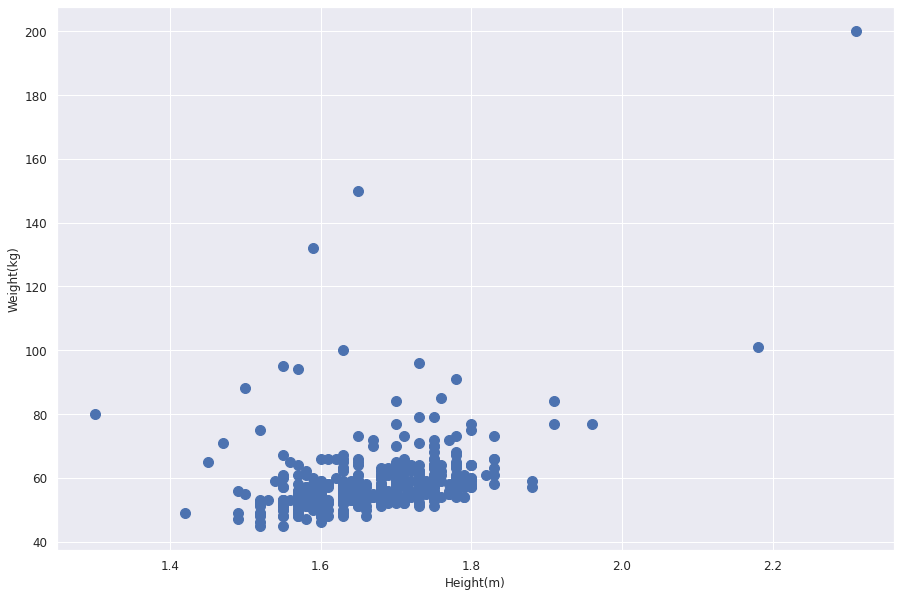

In [ ]:
sns.set()
f_plot = dff.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=10, legend=False, fontsize=12)
f_plot.set_ylabel('Weight(kg)', fontsize=12)
f_plot.set_xlabel('Height(m)', fontsize=12)

In [ ]:
print('Average Height = ' + str(round(dff['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(dff['weight'].mean(), 2)) + 'kg')

Average Height = 1.67m, Average Weight = 58.34kg


Text(0.5, 0, 'Height(m)')

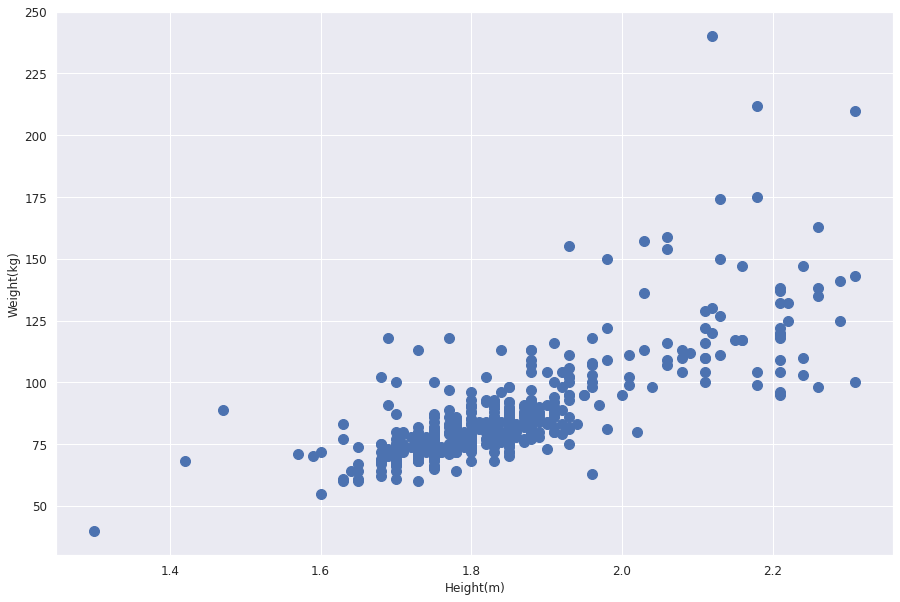

In [ ]:
f_plot = dfm.plot(style='o', x='height', y='weight', figsize=(15,10), grid=True, markersize=10, legend=False, fontsize=12)
f_plot.set_ylabel('Weight(kg)', fontsize=12)
f_plot.set_xlabel('Height(m)', fontsize=12)

In [ ]:
print('Average Height = ' + str(round(dfm['height'].mean(), 2)) + 'm, Average Weight = ' + str(round(dfm['weight'].mean(), 2)) + 'kg')

Average Height = 1.85m, Average Weight = 86.93kg


In [ ]:
def get_face_encoding(image_path):
    try:
      picture_of_me = face_recognition.load_image_file(image_path)
    except FileNotFoundError:
      print(image_path + " no file found")
      return np.zeros(128).tolist()
    my_face_encoding = face_recognition.face_encodings(picture_of_me)
    if not my_face_encoding:
        print(image_path + " no face found !!!")
        return np.zeros(128).tolist()
    return my_face_encoding[0].tolist()

In [ ]:
all_faces = []
for image_name in df.image:
  face_enc = get_face_encoding('/content/Face_to_BMI/Data/Images_vip/'+image_name+'.jpg')
  all_faces.append(face_enc)

/content/Face_to_BMI/Data/Images_vip/f_090.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/f_126.jpg no file found
/content/Face_to_BMI/Data/Images_vip/f_325.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/f_342.jpg no file found
/content/Face_to_BMI/Data/Images_vip/f_406.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/f_483.jpg no file found
/content/Face_to_BMI/Data/Images_vip/f_487.jpg no file found
/content/Face_to_BMI/Data/Images_vip/m_118.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/m_130.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/m_196.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/m_246.jpg no file found
/content/Face_to_BMI/Data/Images_vip/m_336.jpg no file found
/content/Face_to_BMI/Data/Images_vip/m_373.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/m_382.jpg no file found
/content/Face_to_BMI/Data/Images_vip/m_390.jpg no face found !!!
/content/Face_to_BMI/Data/Images_vip/m_452.jpg no fac

In [ ]:
X = np.array(all_faces) ## This is the training data matrix
y_height = df.height.values ## all labels
y_weight = df.weight.values
y_BMI = df.BMI.values
plotX = pd.DataFrame(X)

[0.12482027 0.08540781]


Text(0.5, 0, 'PCA 2')

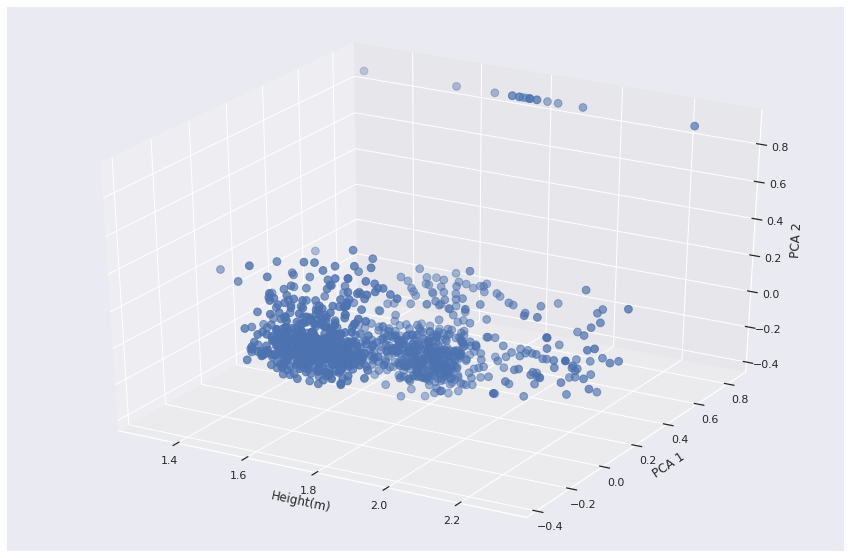

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(plotX)
print(pca.explained_variance_ratio_)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
pca1 = principalDf['principal component 1'].tolist()
pca2 = principalDf['principal component 2'].tolist()
sns.set()
#plt.figure(figsize=(15,10))
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_height, pca1, pca2, s=60)
ax.set_xlabel('Height(m)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)

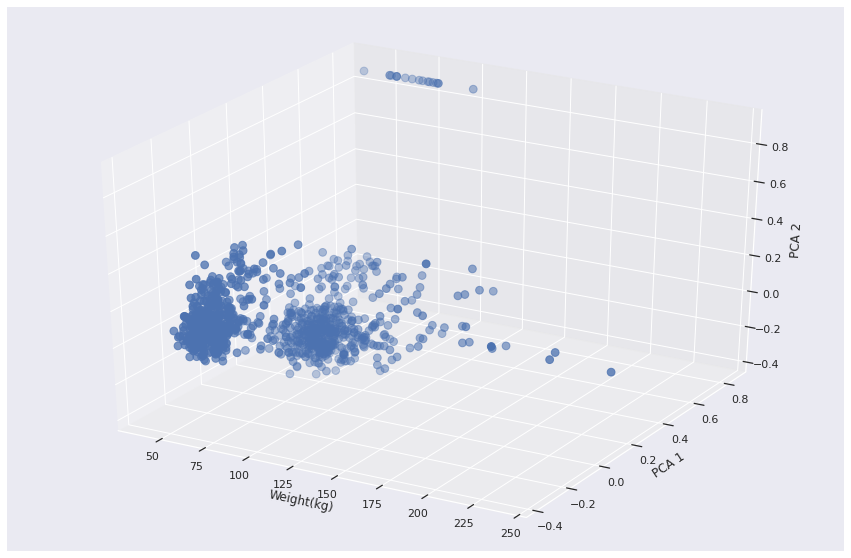

In [ ]:
fig = plt.figure(figsize=(15,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(y_weight, pca1, pca2, s=60)
ax.set_xlabel('Weight(kg)', fontsize=12)
ax.set_ylabel('PCA 1', fontsize=12)
ax.set_zlabel('PCA 2', fontsize=12)
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_height_train, y_height_test, y_weight_train, y_weight_test ,y_BMI_train, y_BMI_test = train_test_split(X, y_height,y_weight,y_BMI, random_state=1)

In [ ]:
def report_goodness(model, X_test, y_test, predictor_log=True):
    # Make predictions using the testing set
    y_pred = model.predict(X_test)
    y_true = y_test

    if predictor_log:
        y_true = np.log(y_test)
    # The coefficients
    # The mean squared error
    print("Mean squared error: %.2f"      % mean_squared_error(y_true, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_true, y_pred))
    
    errors = abs(y_pred - y_true)
    mape = 100 * np.mean(errors / y_true)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

In [ ]:
from sklearn.kernel_ridge import KernelRidge
from sklearn import  linear_model
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
model_height = linear_model.LinearRegression()
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.35
Model Performance
Average Error: 0.0503 degrees.
Accuracy = 90.40%.


In [ ]:
model_weight = linear_model.LinearRegression()
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.03
Variance score: 0.60
Model Performance
Average Error: 0.1232 degrees.
Accuracy = 97.15%.


In [ ]:
model_BMI = linear_model.LinearRegression()
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.42
Model Performance
Average Error: 0.0884 degrees.
Accuracy = 97.22%.


In [ ]:
model_height = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_height = model_height.fit(X_train, np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.00
Variance score: 0.38
Model Performance
Average Error: 0.0477 degrees.
Accuracy = 90.92%.


In [ ]:
model_weight = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.03
Variance score: 0.61
Model Performance
Average Error: 0.1146 degrees.
Accuracy = 97.35%.


In [ ]:
model_BMI = Ridge(fit_intercept=True, alpha=0.0015, random_state=4, normalize=True)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.01
Variance score: 0.46
Model Performance
Average Error: 0.0844 degrees.
Accuracy = 97.35%.


In [ ]:
model_height = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_height = model_height.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.31
Model Performance
Average Error: 0.0486 degrees.
Accuracy = 90.73%.


In [ ]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
rf = RandomForestRegressor()

In [ ]:
rf_height_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_height_model.fit(X_train,np.log(y_height_train))
report_goodness(rf_height_model, X_test, y_height_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 18.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 35.3min finished


Mean squared error: 0.00
Variance score: 0.36
Model Performance
Average Error: 0.0467 degrees.
Accuracy = 91.09%.


In [ ]:
model_weight = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_weight = model_weight.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.04
Variance score: 0.47
Model Performance
Average Error: 0.1336 degrees.
Accuracy = 96.91%.


In [ ]:
rf_weight_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_weight_model.fit(X_train,np.log(y_weight_train))
report_goodness(rf_weight_model,X_test,y_weight_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  4.9min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 21.9min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.3min finished


Mean squared error: 0.03
Variance score: 0.59
Model Performance
Average Error: 0.1138 degrees.
Accuracy = 97.38%.


In [ ]:
model_BMI = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100)
model_BMI = model_BMI.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.02
Variance score: 0.29
Model Performance
Average Error: 0.0964 degrees.
Accuracy = 96.97%.


In [ ]:
rf_BMI_model = RandomizedSearchCV(estimator=rf, param_distributions=random_grid, n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)
# Fit the random search model
rf_BMI_model.fit(X_train,np.log(y_BMI_train))
report_goodness(rf_BMI_model, X_test, y_BMI_test)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed: 21.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 40.2min finished


Mean squared error: 0.02
Variance score: 0.43
Model Performance
Average Error: 0.0845 degrees.
Accuracy = 97.35%.


In [ ]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')

In [ ]:
svrmodel_height = regressor.fit(X_train,np.log(y_height_train))
report_goodness(svrmodel_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: 0.30
Model Performance
Average Error: 0.0520 degrees.
Accuracy = 90.05%.


In [ ]:
regressor = SVR(kernel = 'rbf')
svrmodel_weight = regressor.fit(X_train, np.log(y_weight_train))
report_goodness(svrmodel_weight, X_test, y_weight_test)

Mean squared error: 0.03
Variance score: 0.63
Model Performance
Average Error: 0.1060 degrees.
Accuracy = 97.57%.


In [ ]:
regressor = SVR(kernel = 'rbf')
svrmodel_BMI = regressor.fit(X_train, np.log(y_BMI_train))
report_goodness(svrmodel_BMI, X_test, y_BMI_test)

Mean squared error: 0.01
Variance score: 0.45
Model Performance
Average Error: 0.0852 degrees.
Accuracy = 97.32%.


In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
regressor = Lasso(alpha=1.0)
model_height = regressor.fit(X_train,np.log(y_height_train))
report_goodness(model_height, X_test, y_height_test)

Mean squared error: 0.01
Variance score: -0.00
Model Performance
Average Error: 0.0627 degrees.
Accuracy = 88.22%.


In [ ]:
regressor = Lasso(alpha=1.0)
model_weight = regressor.fit(X_train, np.log(y_weight_train))
report_goodness(model_weight, X_test, y_weight_test)

Mean squared error: 0.07
Variance score: -0.00
Model Performance
Average Error: 0.2102 degrees.
Accuracy = 95.10%.


In [ ]:
regressor = Lasso(alpha=1.0)
model_BMI = regressor.fit(X_train, np.log(y_BMI_train))
report_goodness(model_BMI, X_test, y_BMI_test)

Mean squared error: 0.03
Variance score: -0.00
Model Performance
Average Error: 0.1229 degrees.
Accuracy = 96.12%.


In [ ]:
from sklearn.externals import joblib

height_model = '/content/drive/My Drive/FaceToBMIModels/rf_height_model'
weight_model = '/content/drive/My Drive/FaceToBMIModels/svrmodel_weight'
bmi_model = '/content/drive/My Drive/FaceToBMIModels/rf_BMI_model'

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
joblib.dump(rf_height_model, height_model)
joblib.dump(svrmodel_weight, weight_model)
joblib.dump(rf_BMI_model, bmi_model)

In [ ]:
height_predictor = joblib.load(height_model)
weight_predictor = joblib.load(weight_model)
bmi_predictor = joblib.load(bmi_model)

In [ ]:
def predict_height_weight_BMI(test_image, height_model, weight_model, bmi_model):
    test_array = np.expand_dims(np.array(get_face_encoding(test_image)), axis=0)
    height = np.exp(height_model.predict(test_array)).item()
    weight = np.exp(weight_model.predict(test_array)).item()
    bmi = np.exp(bmi_model.predict(test_array)).item()
    return 'Height: {}m\nWeight: {}kg\nBmi: {}kg/m^2'.format(round(height, 2), round(weight, 2), round(bmi, 2))

In [ ]:
import ipywidgets as widgets
from IPython.display import display 
import os
images = os.listdir('/content/Face_to_BMI/Data/Test_Images3/')
for img in images:
  img_loc = '/content/Face_to_BMI/Data/Test_Images3/' + img
  img_file = open(img_loc, 'rb')
  test_img = img_file.read()
  pred = predict_height_weight_BMI(img_loc, height_predictor, weight_predictor, bmi_predictor)
  display(widgets.Image(value=test_img, format='jpg', width=300, height=400))
  print(pred)

Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00\x18\x00\x18\x00\x00\xff\xdb\x00C\x00\x03\x02\x0…

Height: 1.67m
Weight: 55.26kg
Bmi: 20.02kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\…

Height: 1.83m
Weight: 79.99kg
Bmi: 24.74kg/m^2


Image(value=b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00H\x00H\x00\x00\xff\xdb\x00\x84\x00\x06\x04\x05\x…

Height: 1.85m
Weight: 89.49kg
Bmi: 24.51kg/m^2
